In [26]:
# Now opening the data with pandas
import pandas as pd
from pandas import Series,DataFrame

# Opening Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

# Preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Checking overall info of the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

In [32]:
# importing data analysis and visualization libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

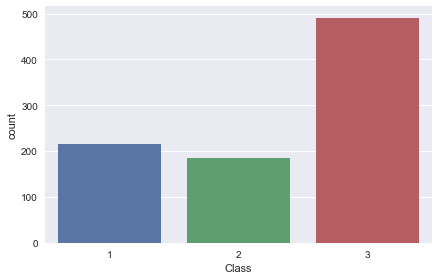

In [36]:
# To get the count of passengers in each class
fg = sns.factorplot('Pclass', data=titanic_df, kind='count', aspect=1.5)
fg.set_xlabels('Class')


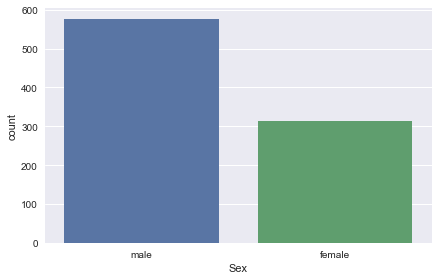

In [35]:
# Checking the gender distribution
sns.factorplot('Sex',data=titanic_df, kind = 'count',aspect =1.5 )

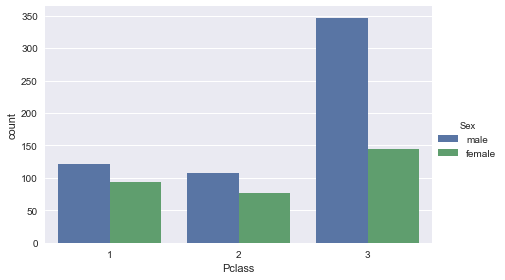

In [38]:
# Checking gender distribution in each class
sns.factorplot('Pclass',data=titanic_df,kind = 'count',hue='Sex', aspect =1.5)

Quite a few males in class-3 compared to male proportion in other classes

In [41]:
# Let's further categorize the gender into 3 bins :child, female and male 
# Function to sort sex into the 3 bins
def gender_dist(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
# Defining a new column Person 
titanic_df['person'] =titanic_df[['Age','Sex']].apply (gender_dist, axis =1)

titanic_df.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


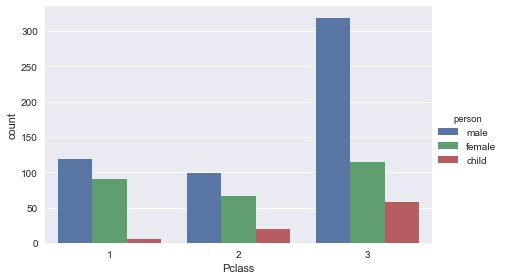

In [45]:
# Now let's try the factor_plot on the new dataset 
sns.factorplot('Pclass',data=titanic_df,hue='person',kind ='count', aspect =1.5)

Interesting quite a bit of children in class-3 than in class-1
Let's further check the age distribution in detail 

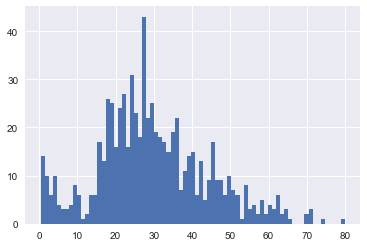

In [52]:
# Using histogram to see age distribution 
titanic_df['Age'].hist(bins = 75)

In [53]:
# Let's also compare child, male and female count
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

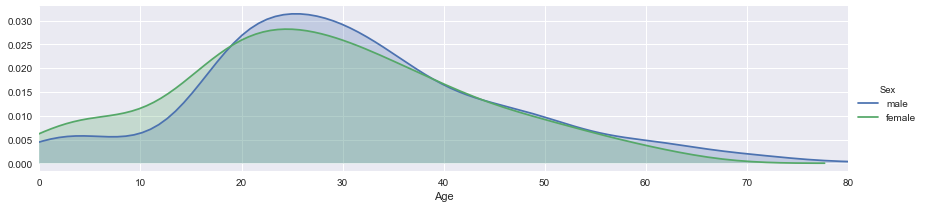

In [59]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Setting the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()


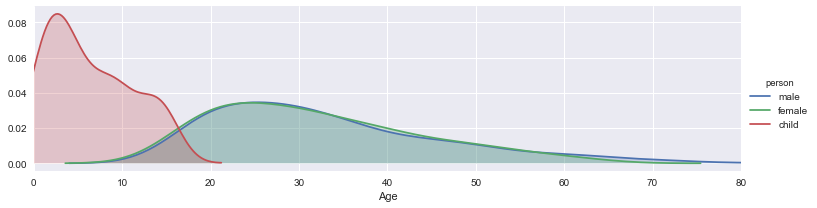

In [62]:
# Now including the person column in kde:

fig = sns.FacetGrid(titanic_df, hue="person",aspect=3.5)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

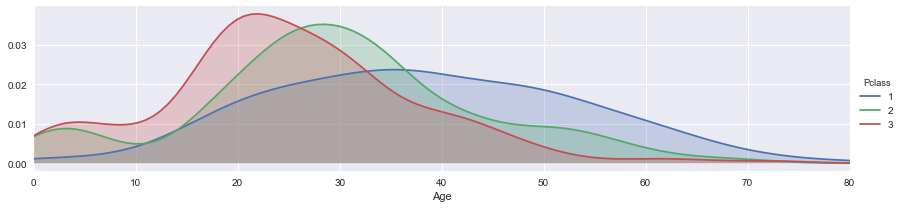

In [63]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class.

# What deck were the passengers on and how does that relate to their class?

In [65]:
# Let's get a quick look at our dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


We can see that the Cabin column has information on the deck, but it has several NaN values, so we'll have to drop them.

In [66]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [67]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

We only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

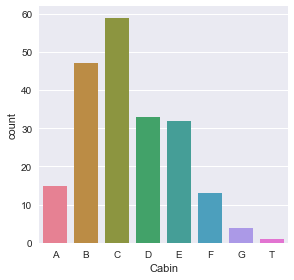

In [103]:
# Setting empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
fig = sns.factorplot('Cabin',data=cabin_df,kind = 'count',palette="husl",legend = True,order =( 'A','B','C','D','E','F','G','T'))

We have a 'T' deck value there which doesn't make sense, we can drop it out with the following code

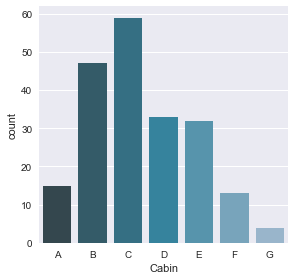

In [102]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin',data=cabin_df,palette='PuBuGn_d',kind = 'count', order =( 'A','B','C','D','E','F','G'))

Thus, we have analyzed the distribution by deck

# Where did the passengers come from?

In [85]:
# Let's take another look at our original data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

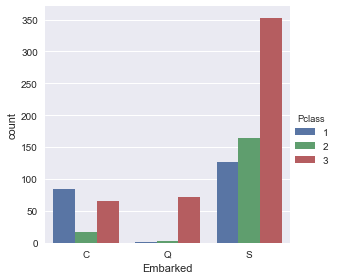

In [95]:
# Now we can make a quick factorplot to check out the results
sns.factorplot('Embarked',data=titanic_df,hue='Pclass', kind = 'count',order=['C','Q','S'])

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.Also, most of the passengers boarded from Southhampton.

Now let's take a look at the 4th question:

# Who was alone and who was with family?

In [105]:
# Adding a new column to definr 'alone'

# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [117]:
# Look for >0 or ==0 to set alone status
def alone_withfamily(passenger):
    Alone = passenger
    if Alone == 0:
        return 'Alone'
    else:
        return 'With Family'
    
# Defining a new column Person 
titanic_df['person'] =titanic_df[['Alone']].apply (alone_withfamily, axis =1)

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index 0')

In [118]:
# Let's check to make sure it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


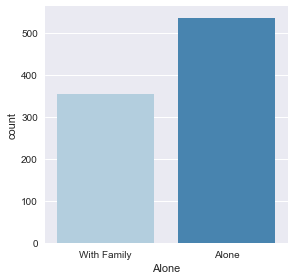

In [121]:
# Let's visualize alone & with family distribution
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind ='count')

# What factors helped someone survive the sinking?

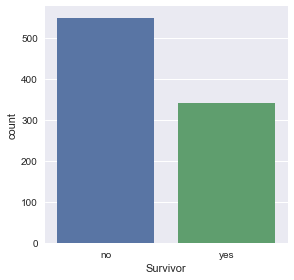

In [125]:
# Creating a new column through mapping 
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Quick look at survied vs died. 
sns.factorplot('Survivor',data=titanic_df,kind = 'count')

So quite a few more people died than those who survived. Let's further investigate if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

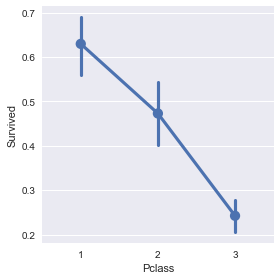

In [126]:
sns.factorplot('Pclass','Survived',data=titanic_df)

Well the graph clearly show that survival did depend on the class of the passenger

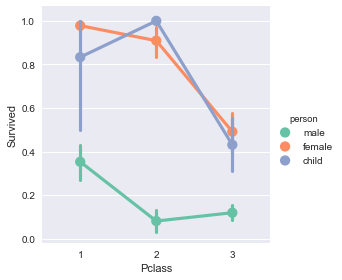

In [131]:
# Let's use a factor plot again, but now considering class and gender
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df, palette='Set2')

Well it is clear that a class-3 male has worst odd of survival, whereas class-1 female has the best chances of survival.

Let's analyze further who age influences one's survival.

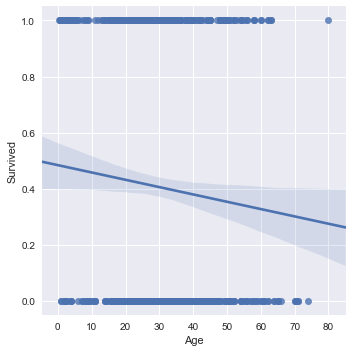

In [133]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_df)

This linear graph clearly show that older passengers have lower chance of survival.

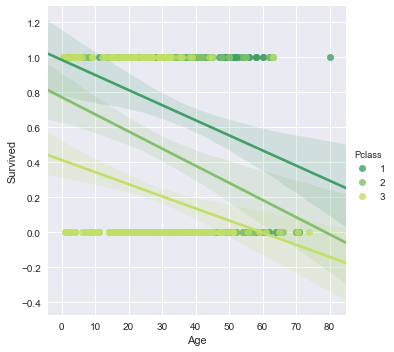

In [135]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='summer')

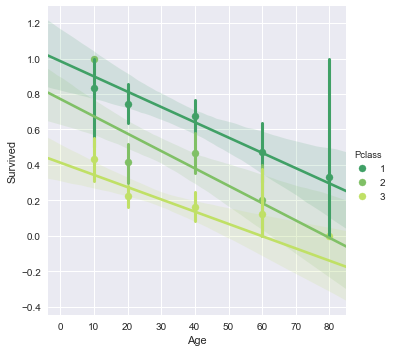

In [137]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='summer',x_bins=generations)

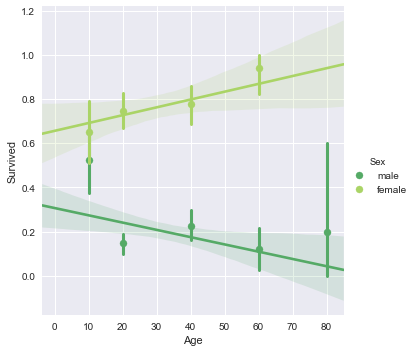

In [139]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='summer',x_bins=generations)

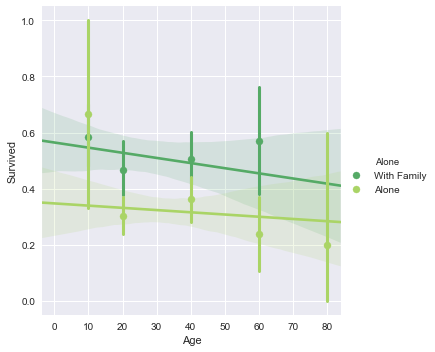

In [144]:
sns.lmplot('Age','Survived',hue='Alone',data=titanic_df,palette='summer',x_bins=generations)

Passangers travelling with family had some advatage for survival.

# Conclusion: Survival of the passenger during the crash depended on many factors like age, class, gender, travelling alone or with family.

In [143]:
from IPython.display import Image
Image(url = 'https://gph.to/2GcySb2')